In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFile = "cars2012.tsv"

In [3]:
# read in the data
data = []
with open(dataFile,'r') as f:
    # first line is the header
    headings = f.readline().rstrip().split("\t")
    for line in f:
        data.append(line.rstrip().split("\t"))

In [61]:
# Assemble into correct Numpy arrays
Xtemp = []
Ytemp = []
for d in data:
    hp = float(d[4])
    wt = float(d[8])
    es = float(d[7])
    mpg = float(d[6])
    #Xtemp.append([1.0,1/hp,wt,1/es])
    #Xtemp.append([1.0,1/hp,wt,1/es])
    Xtemp.append([1.0,1/hp])
    Ytemp.append(mpg)
X = np.array(Xtemp)
Y = np.array(Ytemp)

In [62]:
X[0:5,:]

array([[ 1.        ,  0.00333333],
       [ 1.        ,  0.00497512],
       [ 1.        ,  0.00212766],
       [ 1.        ,  0.00196078],
       [ 1.        ,  0.00473934]])

# Compute multiple linear regression

In [63]:
A = np.matmul(X.T,X)
B = np.matmul(X.T,Y)
w = np.linalg.solve(A,B)
print("Answer coefficients: ",w)

Answer coefficients:  [   11.36641802  2669.92755379]


## Predictions for all cars

In [64]:
Yhat = np.matmul(X,w)
for i in range(5):
    print("(Y,Yhat) = ",(Y[i],Yhat[i]))

(Y,Yhat) =  (18.0, 20.266176529880472)
(Y,Yhat) =  (26.0, 24.649639677898815)
(Y,Yhat) =  (15.0, 17.047114940200977)
(Y,Yhat) =  (13.0, 16.601570083497933)
(Y,Yhat) =  (28.0, 24.020103106303477)


In [65]:
# Root mean squared error
rmse = np.sqrt(np.mean((Y-Yhat)**2))
print("RMSE = ",rmse)

RMSE =  3.84728288273


In [15]:
# R^2 value

In [66]:
r2 = 1 - (np.sum((Y-Yhat)**2))/(np.sum((Y-np.mean(Y))**2))
print("R^2 = ",r2)

R^2 =  0.72096447974


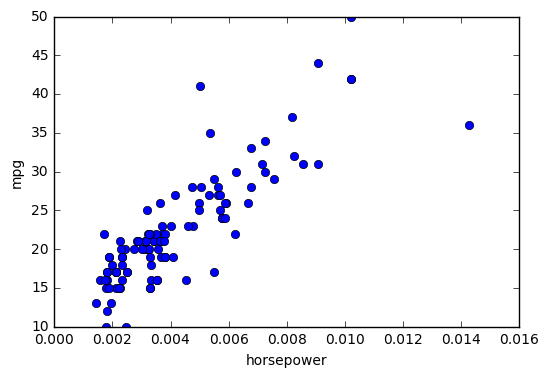

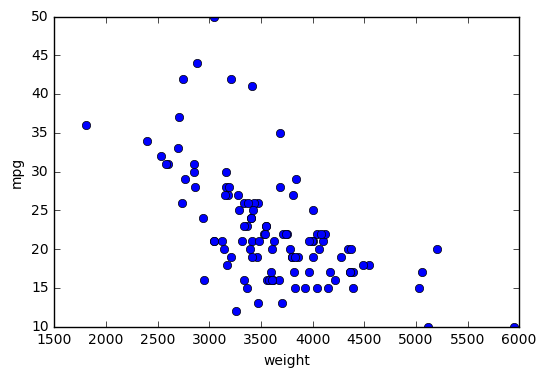

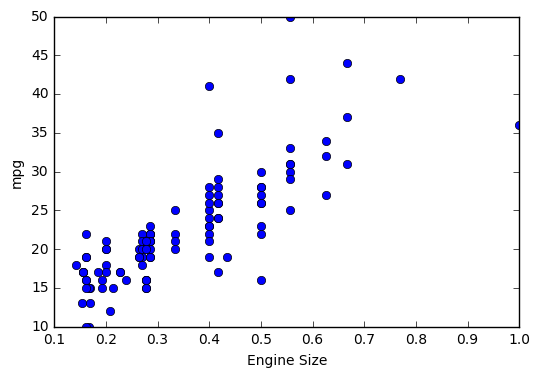

In [32]:
plt.figure(1)
plt.plot(1/X[:,1],Y,"bo")
plt.ylabel("mpg")
plt.xlabel("horsepower")
plt.figure(2)
plt.plot(X[:,2],Y,"bo")
plt.ylabel("mpg")
plt.xlabel("weight")
plt.figure(3)
plt.plot(1/X[:,3],Y,"bo")
plt.ylabel("mpg")
plt.xlabel("Engine Size")
plt.show()